# Brest Cancer Classification with Neural Network


Importing the Dependencies


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

Data collection and Preprocessing

In [5]:
brest_cancer_dataset=sklearn.datasets.load_breast_cancer()

In [9]:
print((brest_cancer_dataset))

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [10]:
#  loading the data into pandas dataframe
data_frame=pd.DataFrame(brest_cancer_dataset.data,columns=brest_cancer_dataset.feature_names)

In [11]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
# adding the 'target' column
data_frame['target']=brest_cancer_dataset.target

In [13]:
# no of rows and column
data_frame.shape

(569, 31)

In [14]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [15]:
# checking for missing values
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [16]:
# staistical measures about data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [17]:
# checking the distribution of the Target Variable
data_frame['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

1 -> Benign

0 -> Maligant

In [18]:
data_frame.groupby('target').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


Seperating the Feature and Target

In [19]:
X=data_frame.drop(columns='target',axis=1)
Y=data_frame['target']

In [20]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [21]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64


Splitting the data into training data and testing Data

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [23]:
print(X.shape,x_train.shape,x_test.shape)

(569, 30) (455, 30) (114, 30)


Standardizing the data

In [30]:
from sklearn.preprocessing import StandardScaler


In [31]:
scaler=StandardScaler()

x_train_std=scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)

In [32]:
# printing standard data
print(x_train_std)

[[-0.01330339  1.7757658  -0.01491962 ... -0.13236958 -1.08014517
  -0.03527943]
 [-0.8448276  -0.6284278  -0.87702746 ... -1.11552632 -0.85773964
  -0.72098905]
 [ 1.44755936  0.71180168  1.47428816 ...  0.87583964  0.4967602
   0.46321706]
 ...
 [-0.46608541 -1.49375484 -0.53234924 ... -1.32388956 -1.02997851
  -0.75145272]
 [-0.50025764 -1.62161319 -0.527814   ... -0.0987626   0.35796577
  -0.43906159]
 [ 0.96060511  1.21181916  1.00427242 ...  0.8956983  -1.23064515
   0.50697397]]


**Building Neural Network**

In [24]:
# importing tensorflow and Keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [26]:
# setting up the layers of Neural Network
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),
    keras.layers.Dense(2,activation='sigmoid')])

In [27]:
# compiling the Neural Network

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


Training the Neural Network

In [33]:
history=model.fit(x_train_std,y_train,validation_split=0.1,epochs=10)

# we can increase the accuracy by using the stamdard scalar function

Epoch 1/10
13/13 [==============================] - 1s 20ms/step - loss: 0.6950 - accuracy: 0.4890 - val_loss: 0.5606 - val_accuracy: 0.8261
Epoch 2/10
13/13 [==============================] - 0s 8ms/step - loss: 0.5073 - accuracy: 0.8386 - val_loss: 0.4112 - val_accuracy: 0.9565
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.3830 - accuracy: 0.9120 - val_loss: 0.3272 - val_accuracy: 0.9565
Epoch 4/10
13/13 [==============================] - 0s 8ms/step - loss: 0.3132 - accuracy: 0.9242 - val_loss: 0.2757 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 7ms/step - loss: 0.2675 - accuracy: 0.9315 - val_loss: 0.2403 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2357 - accuracy: 0.9364 - val_loss: 0.2142 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2109 - accuracy: 0.9413 - val_loss: 0.1935 - val_accuracy: 0.9565
Epoch 8/10
13/13 [=

visualizing the accuracy and the loss

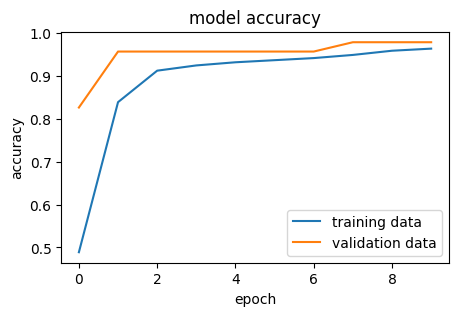

In [36]:
plt.figure(figsize=(5,3))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data','validation data'],loc='lower right')

plt.show()

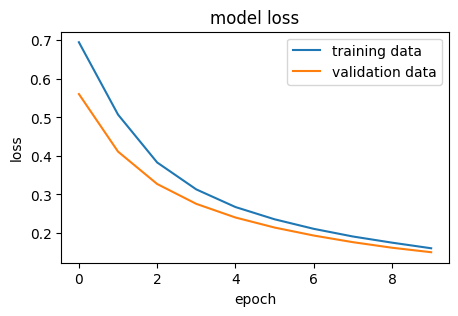

In [37]:
plt.figure(figsize=(5,3))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data','validation data'],loc='upper right')

plt.show()

Accuracy of the model on test data

In [38]:
loss,accuracy=model.evaluate(x_test_std,y_test)
print(accuracy)

4/4 [==============================] - 0s 4ms/step - loss: 0.1423 - accuracy: 0.9737
0.9736841917037964


In [39]:
print(x_test_std.shape)
print(x_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [40]:
# predicting on test data
Y_pred=model.predict(x_test_std)

4/4 [==============================] - 0s 4ms/step


In [41]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.40619156 0.5978326 ]


In [42]:
Y_pred

array([[0.40619156, 0.5978326 ],
       [0.38906687, 0.53475493],
       [0.17868888, 0.80503494],
       [0.80572635, 0.14851397],
       [0.40765715, 0.51448   ],
       [0.7942088 , 0.1614631 ],
       [0.27352208, 0.703852  ],
       [0.17289539, 0.78739357],
       [0.21463957, 0.7524062 ],
       [0.20554891, 0.7557974 ],
       [0.41794643, 0.48266086],
       [0.29426095, 0.6986875 ],
       [0.29285237, 0.7230078 ],
       [0.2810833 , 0.6687644 ],
       [0.1894775 , 0.785384  ],
       [0.78618765, 0.22183496],
       [0.19215897, 0.7879807 ],
       [0.21685359, 0.7609026 ],
       [0.1808181 , 0.77895296],
       [0.7602505 , 0.15623353],
       [0.22281523, 0.69808495],
       [0.18952212, 0.7903381 ],
       [0.2017376 , 0.77152437],
       [0.18191141, 0.7902395 ],
       [0.23916179, 0.73933333],
       [0.76077384, 0.19405541],
       [0.23543805, 0.7277572 ],
       [0.3051076 , 0.64145786],
       [0.71891016, 0.25880554],
       [0.7611341 , 0.20417097],
       [0.

model.predict() gives the prediction probability for each class for that data point


In [43]:
# argmax function returns the index of max value of the list
# eg
mylist=[10,30,20,50,40]

index_of_max_value=np.argmax(mylist)
print(mylist)
print(index_of_max_value)

# max value is 50 and its index is 3

[10, 30, 20, 50, 40]
3


In [44]:
# converting the prediction probability to class labels
y_pred_labels= [np.argmax(i) for i in Y_pred]
print(y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


**Building the predictive system**

In [45]:
input_data=()

# change the input data to a numy array
input_data_as_numpy_array=np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std=scaler.transform(input_data_reshaped)

prediction=model.predict(input_data_std)
print(prediction)

prediction_label=[np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0]==0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: Found array with 0 feature(s) (shape=(1, 0)) while a minimum of 1 is required by StandardScaler.